<a href="https://colab.research.google.com/github/JohnTaco93/IMS_training/blob/main/ex9_1_ARMA_john.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#%% Change to the root directory
# Example:
#os.chdir("C:/Users/Desktop/LAMDATA")
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
cd /content/gdrive/My Drive/colab taco/IMS_training/Exercise9_python_Trainee

/content/gdrive/My Drive/colab taco/IMS_training/Exercise9_python_Trainee


In [16]:
pip install lmfit

In [17]:
pip install git+https://github.com/madrury/py-glm.git

  Cloning https://github.com/madrury/py-glm.git to /tmp/pip-req-build-lcp0tp2z
  Running command git clone -q https://github.com/madrury/py-glm.git /tmp/pip-req-build-lcp0tp2z
  Created wheel for py-glm: filename=py_glm-0.0.1-cp36-none-any.whl size=16020 sha256=ace426280bd98e5ec2d19343d07333cebdb1b2adc9d33c85fe92750b48b9560a
  Stored in directory: /tmp/pip-ephem-wheel-cache-m6ol463a/wheels/ba/f8/77/41a1cc9756ab50434bbadffdf60a20742fc01bfd5ea3e056eb
Successfully built py-glm


In [18]:
#%% IMS TRAINING -- MINI PROJECT
#%% Exercise 9.1: Health Prediction Using ARMA Model

# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import glm
import numpy.polynomial.polynomial as poly
from functions import generate_data, exp_regression, exp_func, getAR, getInitial, getResiduals, getModelJacobian, ARMA, forecastARMA
import warnings
warnings.filterwarnings('ignore')

(0.0, 60.0)

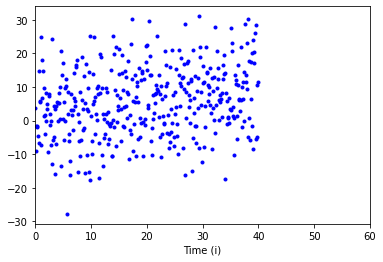

In [19]:
# Initialization & data loading
t,y,t_test,y_test = generate_data()

plt.figure(1)
plt.plot(t, y, 'b.')
plt.xlabel('Time (i)')
plt.xlim([0, 60])


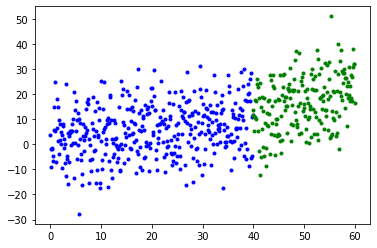

In [20]:
#%% fitting

plt.figure(2);
plt.plot(t, y, 'b.',label='past data')
plt.plot(t_test, y_test, 'g.',label='future data')
tt = np.append(t,t_test,axis=0)

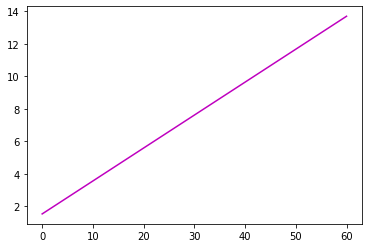

In [21]:
# linear prediction model fittig
''' 
Fit an linear prediction model using the polynomial functions
example:
    coefs = poly.polyfit(t[:,0], y[:,0], 1)
    predict = poly.polyval(tt[:,0], coefs)
'''   
# ================= Your Code Here =========================
coefs = poly.polyfit(t[:,0], y[:,0], 1)
y_lin = poly.polyval(tt[:,0], coefs)
# ===============================
plt.plot(tt, y_lin, 'm', label='linear')

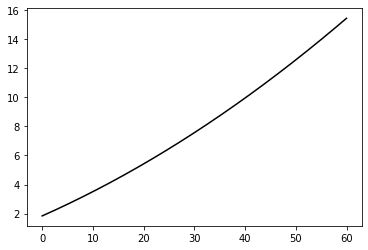

In [22]:
# 2nd order polynomial fitting
'''
Fit an linear prediction model using the polynomial functions
'''
# ================= Your Code Here =========================
coefs = poly.polyfit(t[:,0], y[:,0], 2)
y_poly = poly.polyval(tt[:,0], coefs)
# ===============================
plt.plot(tt, y_poly, 'k', label='quadratic')

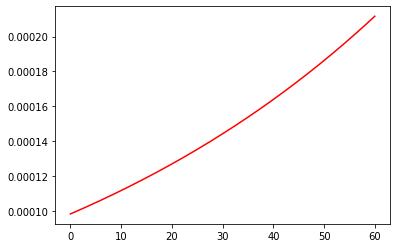

In [23]:
betahat, yy = exp_regression(y, t)
y_exp = exp_func(betahat, tt)

plt.plot(tt, y_exp, 'r', label='exponential')


Text(0.5, 0, 'Time (i)')

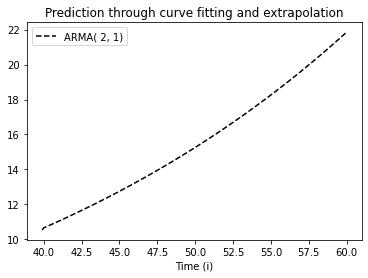

In [24]:
# ARMA prediction
k = len(t_test) # k step ahead

# Predicted the future health trend using the 'forecastARMA' function 
# ================= Your Code Here =========================
#ARMA Model
data = y
p = 2
q = 1
ahead = k
phi,theta,fcast,SSR_pred = forecastARMA(data,p,q,ahead)
# =====================================================
plt.figure(2)
plt.plot(t_test, fcast, '--k',label='ARMA({p: 0.0f},{q: 0.0f})'.format(p=p, q=q))
plt.legend()
plt.title('Prediction through curve fitting and extrapolation')
plt.xlabel('Time (i)')